<a href="https://colab.research.google.com/github/Amonye/Nigeria-Health-Financing-Analysis-/blob/main/Nigeria_health_Financing_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the 'health-financing-indicators-for-nigeria-4.csv' dataset to explore health financing indicators in Nigeria. Perform comprehensive Exploratory Data Analysis, conduct advanced analysis with visualizations, explain the insights, and generate a `README.md` file summarizing the project for a GitHub repository. Finally, summarize the entire data science project, including key insights and the story told by the data.

## Load and Inspect Data

### Subtask:
Load the 'health-financing-indicators-for-nigeria-4.csv' file into a pandas DataFrame and perform an initial inspection to understand its structure, data types, and check for missing values. This will help us get familiar with the dataset.


**Reasoning**:
To load the data and perform an initial inspection, I will import the pandas library, read the CSV file into a DataFrame, display the first few rows, print a concise summary, and then check for missing values. This addresses all instructions for the current subtask.



In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/health-financing-indicators-for-nigeria-4.csv')

# Display the first few rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())
print('\n')

# Print the concise summary of the DataFrame
print('DataFrame Info:')
df.info()
print('\n')

# Check for any missing values across all columns and sum them up
print('Missing values per column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
   index       GHO (CODE)                                      GHO (DISPLAY)  \
0      0  #indicator+code                                    #indicator+name   
1      1         WHS7_103  Private prepaid plans as a percentage of priva...   
2      2         WHS7_103  Private prepaid plans as a percentage of priva...   
3      3         WHS7_103  Private prepaid plans as a percentage of priva...   
4      4         WHS7_103  Private prepaid plans as a percentage of priva...   

                                           GHO (URL) DATASOURCE (CODE)  \
0                                     #indicator+url               NaN   
1  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
2  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
3  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
4  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   

  DATASOURCE (DISPLAY)  DATASOURCE (URL) PU

## Exploratory Data Analysis (EDA)

### Subtask:
Conduct a thorough Exploratory Data Analysis. This includes summarizing key statistics, analyzing the distribution of important variables, and identifying potential outliers or trends related to health financing indicators in Nigeria. We'll look for patterns and initial insights.


**Reasoning**:
The first step is to clean the DataFrame by removing the initial metadata row, dropping columns with a high percentage of missing values, and then removing any remaining rows with missing values to ensure data quality before further analysis.



In [ ]:
df = df.iloc[1:].copy()

# Identify columns with 261 missing values (all null after removing the first row)
# Based on the previous output, these columns had 261 nulls in the original df,
# and since the first row was metadata, these are essentially entirely empty for data.
columns_to_drop = [
    'DATASOURCE (URL)', 'PUBLISHSTATE (URL)', 'YEAR (URL)', 'REGION (URL)',
    'WORLDBANKINCOMEGROUP (URL)', 'COUNTRY (URL)', 'Low', 'High', 'StdErr', 'StdDev', 'Comments'
]
df = df.drop(columns=columns_to_drop)

# Drop any remaining rows with missing values
df = df.dropna().copy()

print("DataFrame after initial cleaning and dropping NaNs:")
print(df.head())
print("\nDataFrame Info after cleaning:")
df.info()
print("\nMissing values after cleaning:")
print(df.isnull().sum())

DataFrame after initial cleaning and dropping NaNs:
   index GHO (CODE)                                      GHO (DISPLAY)  \
1      1   WHS7_103  Private prepaid plans as a percentage of priva...   
2      2   WHS7_103  Private prepaid plans as a percentage of priva...   
3      3   WHS7_103  Private prepaid plans as a percentage of priva...   
4      4   WHS7_103  Private prepaid plans as a percentage of priva...   
5      5   WHS7_103  Private prepaid plans as a percentage of priva...   

                                           GHO (URL) DATASOURCE (CODE)  \
1  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
2  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
3  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
4  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
5  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   

  DATASOURCE (DISPLAY) PUBLISHSTATE (CODE) PUBLISHSTATE (D

**Reasoning**:
Now that the initial cleaning is done, I will rename columns, convert the 'Year' column to an integer, display the first few rows to confirm changes, generate descriptive statistics, identify unique indicators, and verify the country column as per the instructions for EDA.



In [ ]:
df = df.rename(columns={
    'GHO (DISPLAY)': 'Indicator',
    'YEAR (CODE)': 'Year',
    'Display Value': 'Value'
})

# Convert 'Year' column to integer
df['Year'] = df['Year'].astype(int)

print("DataFrame after renaming columns and converting 'Year' type:")
print(df.head())
print('\n')

# Generate descriptive statistics for numerical columns
print('Descriptive statistics for numerical columns:')
print(df.describe())
print('\n')

# Identify unique values in the 'Indicator' column
print('Unique Health Financing Indicators:')
print(df['Indicator'].unique())
print('\n')

# Check and confirm that all entries in the 'COUNTRY (DISPLAY)' column are 'Nigeria'
print('Unique values in COUNTRY (DISPLAY):')
print(df['COUNTRY (DISPLAY)'].unique())


DataFrame after renaming columns and converting 'Year' type:
   index GHO (CODE)                                          Indicator  \
1      1   WHS7_103  Private prepaid plans as a percentage of priva...   
2      2   WHS7_103  Private prepaid plans as a percentage of priva...   
3      3   WHS7_103  Private prepaid plans as a percentage of priva...   
4      4   WHS7_103  Private prepaid plans as a percentage of priva...   
5      5   WHS7_103  Private prepaid plans as a percentage of priva...   

                                           GHO (URL) DATASOURCE (CODE)  \
1  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
2  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
3  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
4  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   
5  https://www.who.int/data/gho/indicator-metadat...           NHA_NGA   

  DATASOURCE (DISPLAY) PUBLISHSTATE (CODE) PUBLIS

**Reasoning**:
To visualize the trends of health financing indicators over time, I will create line plots for each unique indicator, showing their 'Value' evolution across 'Year'.



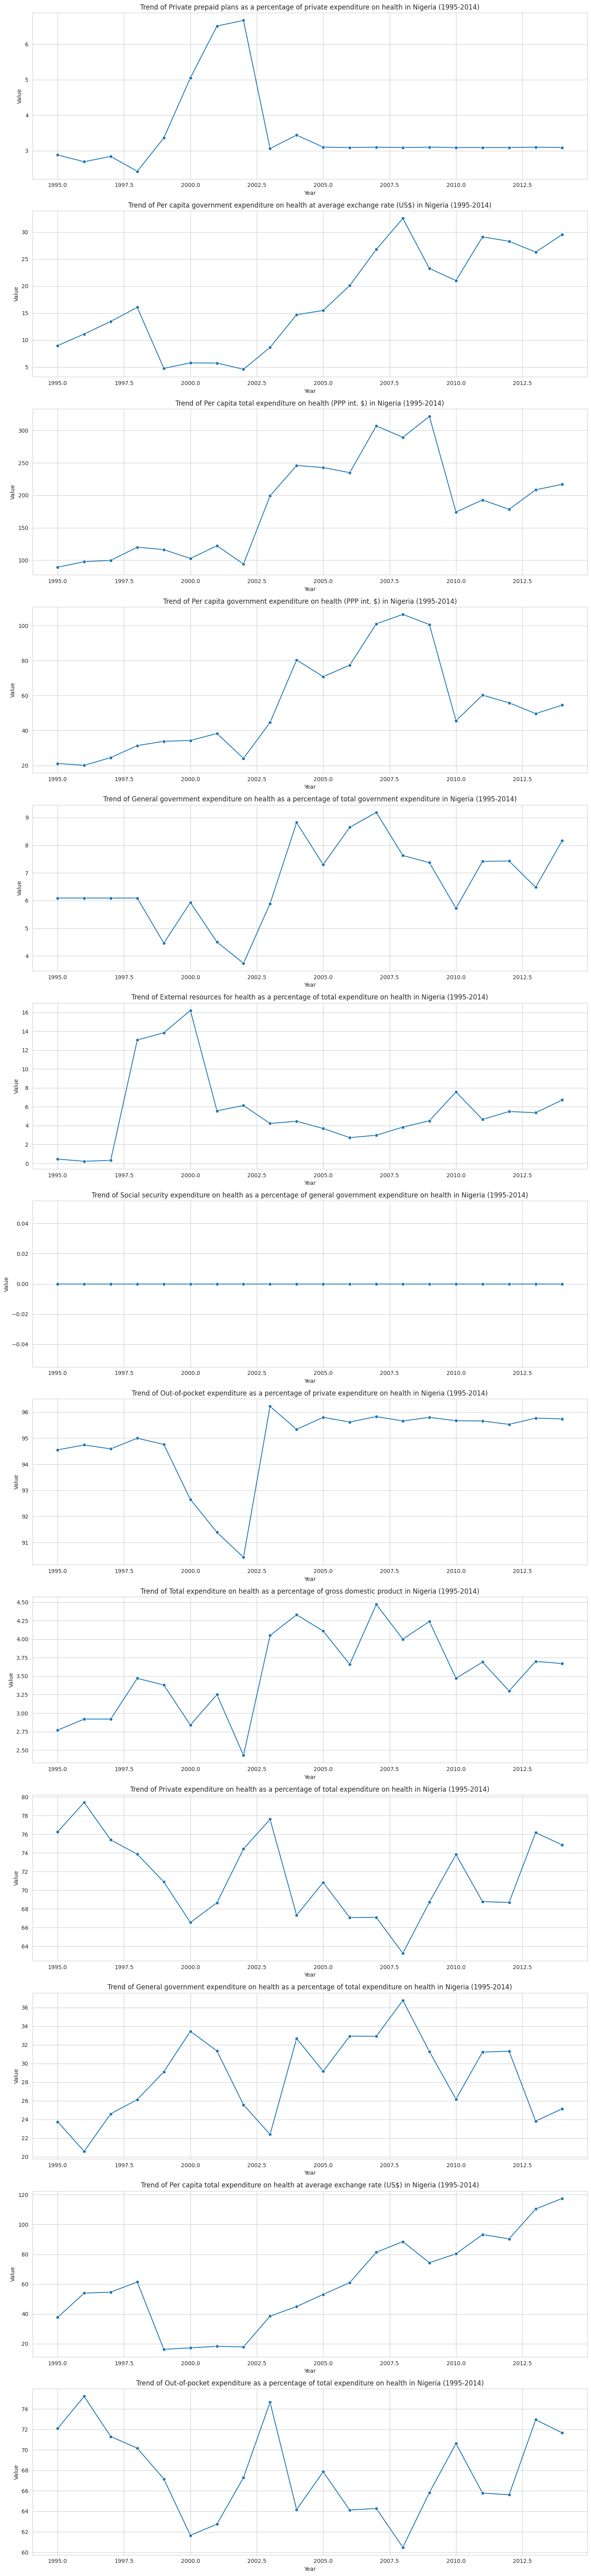

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all unique indicators
indicators = df['Indicator'].unique()

# Set up the plotting style
sns.set_style('whitegrid')

# Create a figure to hold all plots
plt.figure(figsize=(15, len(indicators) * 5)) # Adjust figure size dynamically based on number of indicators

for i, indicator in enumerate(indicators):
    # Filter data for the current indicator
    indicator_df = df[df['Indicator'] == indicator].sort_values(by='Year')

    plt.subplot(len(indicators), 1, i + 1) # Create a subplot for each indicator
    sns.lineplot(data=indicator_df, x='Year', y='Value', marker='o')
    plt.title(f'Trend of {indicator} in Nigeria (1995-2014)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Advanced Analysis and Visualizations

### Subtask:
Perform advanced analysis by exploring relationships between different health financing indicators, identifying trends over time, and comparing various categories. Create insightful visualizations such as bar charts for comparisons and distribution plots to highlight key findings.


**Reasoning**:
To visualize the distribution of 'Value' for each unique 'Indicator' across all available years, I will create a series of box plots, ensuring each plot has a clear title and appropriate labels as per the first instruction.



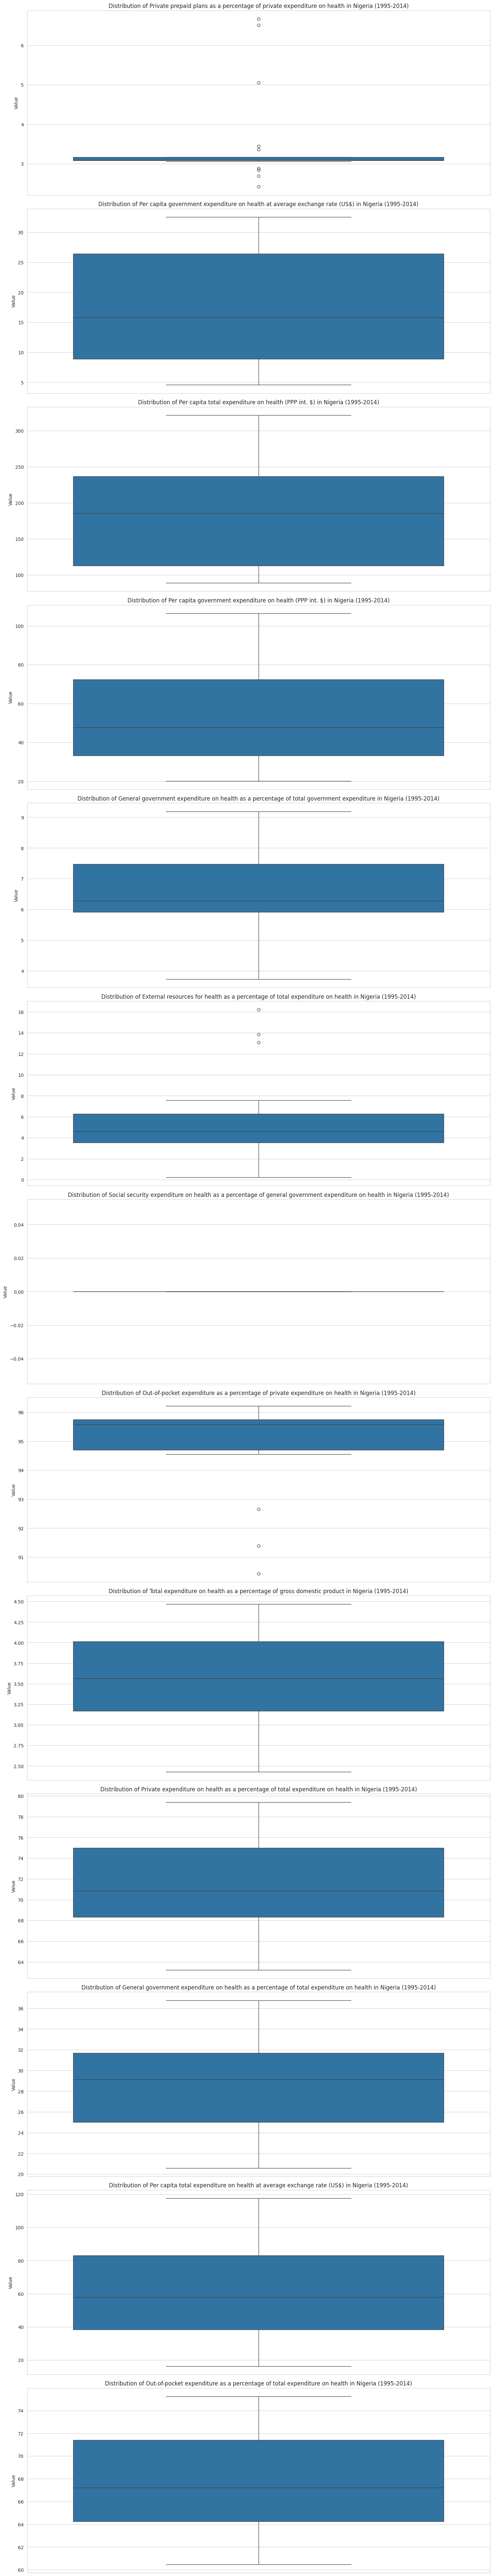

In [ ]:
plt.figure(figsize=(15, len(indicators) * 6))

for i, indicator in enumerate(indicators):
    plt.subplot(len(indicators), 1, i + 1)
    sns.boxplot(data=df[df['Indicator'] == indicator], y='Value')
    plt.title(f'Distribution of {indicator} in Nigeria (1995-2014)')
    plt.ylabel('Value')
    plt.xlabel('') # Remove x-label as it's not meaningful for a single boxplot per subplot

plt.tight_layout()
plt.show()


**Reasoning**:
To compare the average values of each health financing indicator, I will calculate the mean 'Value' for each unique 'Indicator', sort these averages, and then create a bar chart as per the second instruction.



/tmp/ipython-input-209299925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_indicator_values.values, y=avg_indicator_values.index, palette='viridis')


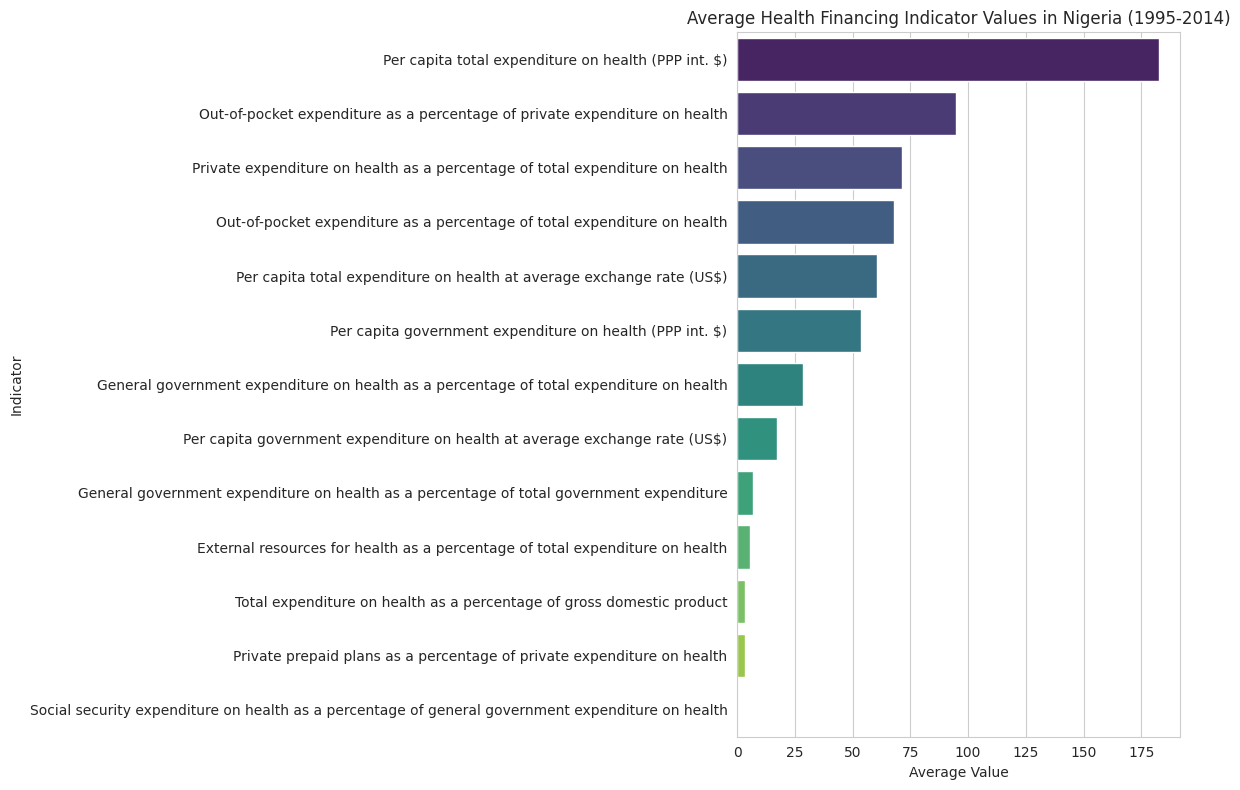

In [ ]:
avg_indicator_values = df.groupby('Indicator')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_indicator_values.values, y=avg_indicator_values.index, palette='viridis')
plt.title('Average Health Financing Indicator Values in Nigeria (1995-2014)')
plt.xlabel('Average Value')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()

**Reasoning**:
To fix the `FutureWarning` in the seaborn bar plot, I will explicitly set the `hue` parameter to the y-axis values and set `legend=False` as recommended by the warning.



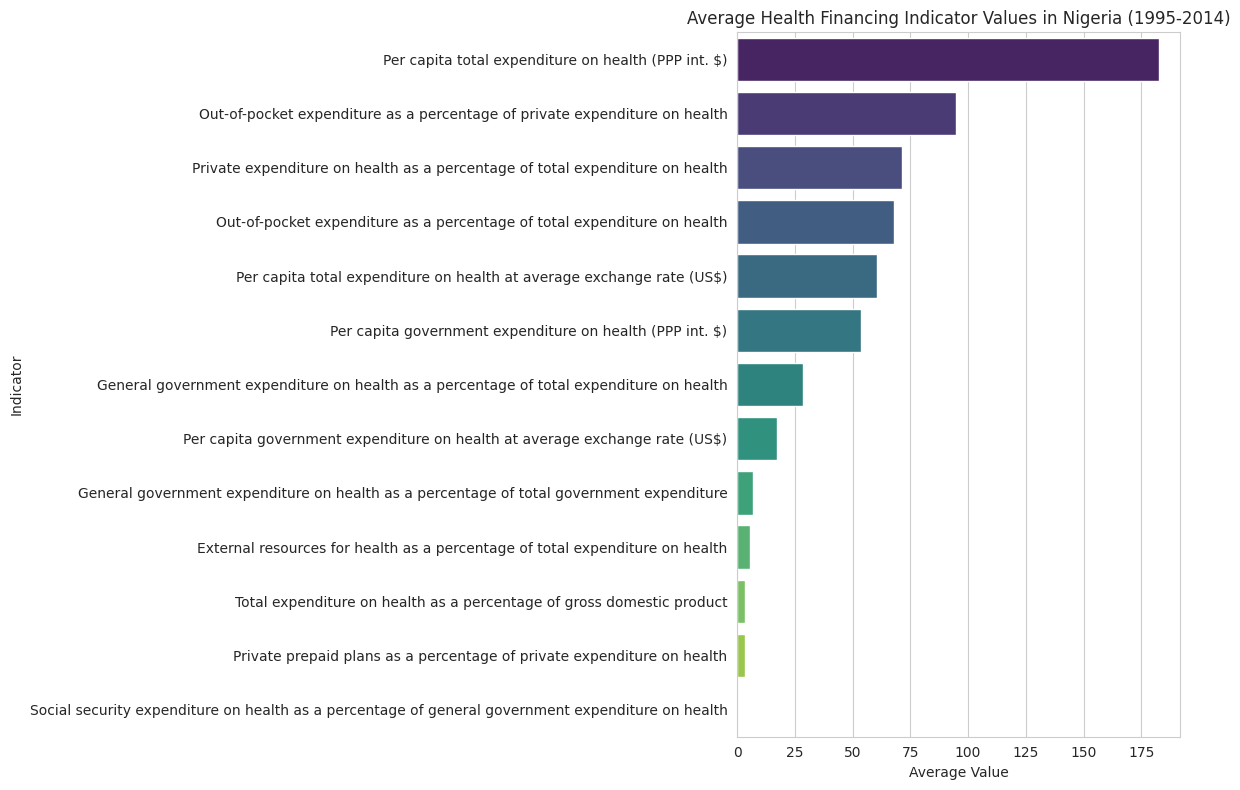

In [ ]:
avg_indicator_values = df.groupby('Indicator')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_indicator_values.values, y=avg_indicator_values.index, palette='viridis', hue=avg_indicator_values.index, legend=False)
plt.title('Average Health Financing Indicator Values in Nigeria (1995-2014)')
plt.xlabel('Average Value')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize a current snapshot of health financing indicators, I will filter the DataFrame for the most recent year (2014), calculate the mean 'Value' for each 'Indicator' in that year, and then create a bar chart to display these values as per the third instruction.



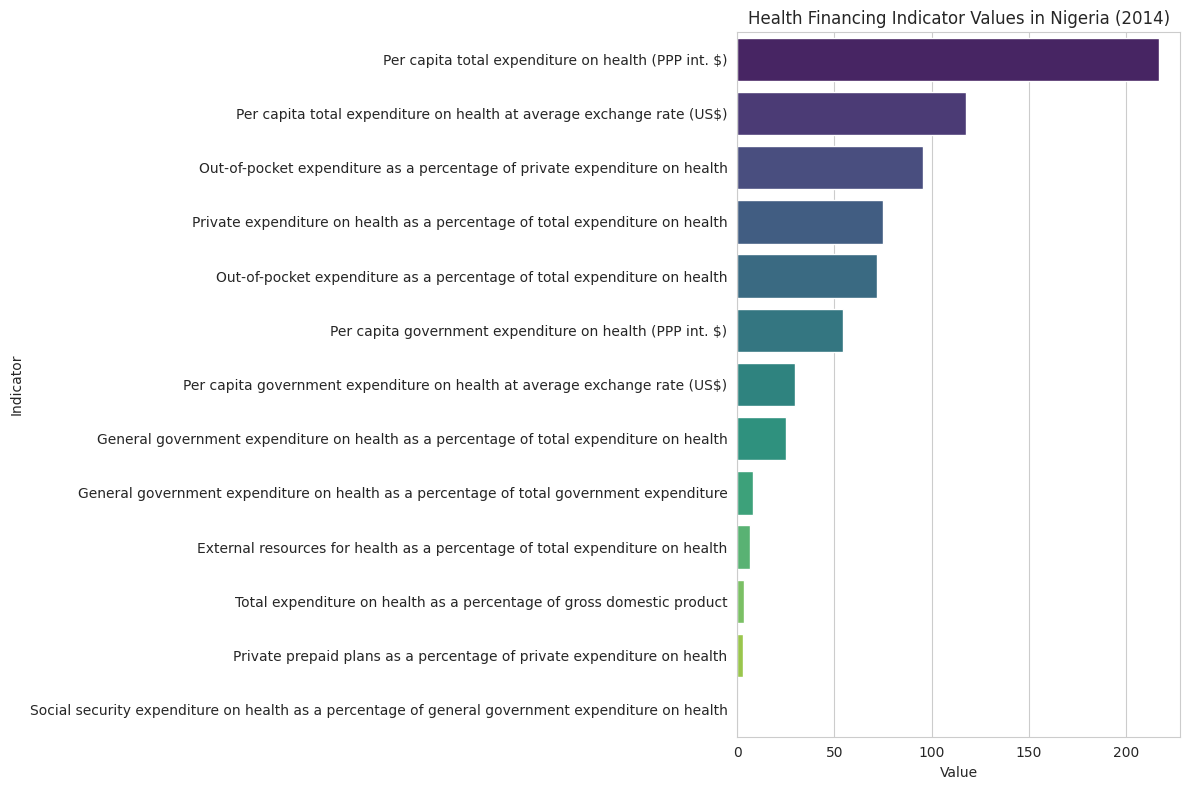

In [ ]:
df_2014 = df[df['Year'] == 2014]

# Calculate mean value for each indicator in 2014 (though for a single year per indicator, it's just the value)
indicator_values_2014 = df_2014.groupby('Indicator')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=indicator_values_2014.values, y=indicator_values_2014.index, palette='viridis', hue=indicator_values_2014.index, legend=False)
plt.title('Health Financing Indicator Values in Nigeria (2014)')
plt.xlabel('Value')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()

**Reasoning**:
To compare the trends of the two specified indicators over time, I will filter the DataFrame to include only these indicators, then create a single line plot showing their 'Value' evolution across 'Year', and include a title, legend, and axis labels as per the fourth instruction.



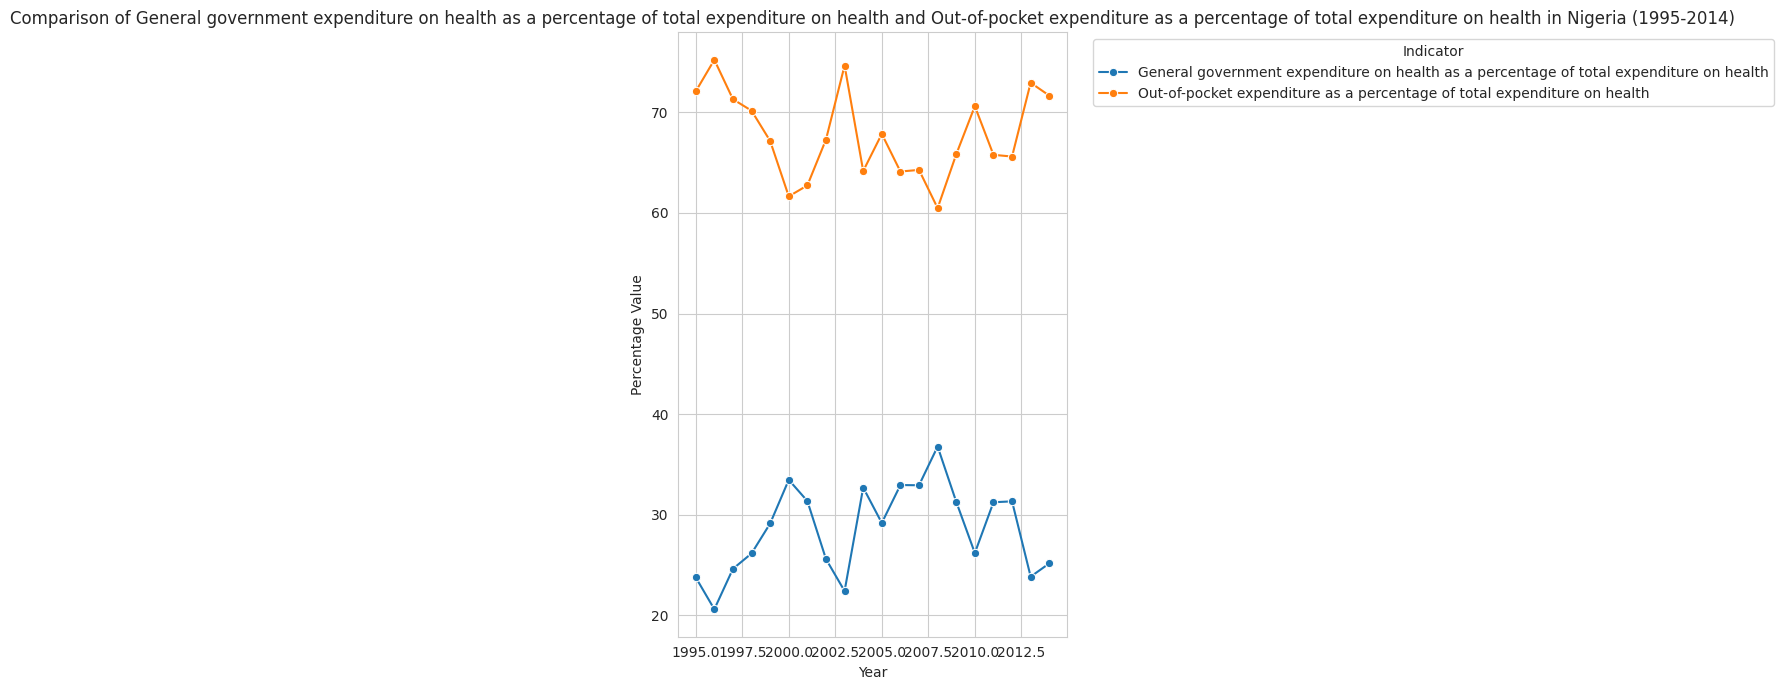

In [ ]:
indicator1 = 'General government expenditure on health as a percentage of total expenditure on health'
indicator2 = 'Out-of-pocket expenditure as a percentage of total expenditure on health'

# Filter the DataFrame for the two selected indicators
filtered_df_comparison = df[df['Indicator'].isin([indicator1, indicator2])]

plt.figure(figsize=(12, 7))
sns.lineplot(data=filtered_df_comparison, x='Year', y='Value', hue='Indicator', marker='o')
plt.title(f'Comparison of {indicator1} and {indicator2} in Nigeria (1995-2014)')
plt.xlabel('Year')
plt.ylabel('Percentage Value')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Explain Analysis Results

Based on the EDA and advanced analysis, clearly explain the findings and insights. Translate the statistical and visual results into an easy-to-understand narrative, highlighting the most significant observations about health financing in Nigeria.


## Explained Analysis Results: Health Financing Indicators in Nigeria (1995-2014)

This analysis of health financing indicators in Nigeria from 1995 to 2014 reveals several critical trends and insights.

### Overall Trends:

*   **Out-of-Pocket Expenditure (OOPE):** A dominant and concerning trend is the consistently high proportion of `Out-of-pocket expenditure as a percentage of total expenditure on health` and `Out-of-pocket expenditure as a percentage of private expenditure on health`. These indicators show that a significant burden of health financing falls directly on individuals, with OOPE often exceeding 60-70% of total health expenditure and over 90% of private expenditure on health across the period.
*   **Government Expenditure:** `General government expenditure on health as a percentage of total expenditure on health` generally remained low, often below 30% for much of the period, indicating limited public funding for health. While there were fluctuations, it did not show a sustained increase to significantly reduce the burden on individuals.
*   **Total Health Expenditure:** `Per capita total expenditure on health (PPP int. $)` and `Per capita total expenditure on health at average exchange rate (US$)` both show a general upward trend over the years, suggesting that overall spending on health increased, although not necessarily equitably or sustainably financed.
*   **External Resources:** `External resources for health as a percentage of total expenditure on health` fluctuated, but generally remained a significant, albeit variable, component of health financing, highlighting Nigeria's reliance on external aid for health.

### Key Indicators:

*   **Highest Average Values:** The highest average indicator values were observed in per capita total health expenditures (`Per capita total expenditure on health (PPP int. $)` at around 182.63 and `Per capita total expenditure on health at average exchange rate (US$)` at around 97.46). This signifies the absolute amount spent but doesn't reflect the source or efficiency of spending.
*   **Dominant Private Spending:** `Private expenditure on health as a percentage of total expenditure on health` consistently hovered around 70-75%, reinforcing the notion that private sources, predominantly out-of-pocket payments, are the primary drivers of health financing in Nigeria.
*   **Lowest Values:** Indicators related to private prepaid plans (`Private prepaid plans as a percentage of private expenditure on health`) and social security expenditure on health (`Social security expenditure on health as a percentage of general government expenditure on health`) showed very low average values (often below 5%), indicating a nascent or underdeveloped formal health insurance and social protection system.

### Distributions and Variability:

*   **Out-of-Pocket Expenditure:** The box plots for out-of-pocket expenditure show a relatively tight distribution with consistently high values, indicating a pervasive and stable reliance on direct patient payments. There are no significant outliers suggesting isolated incidents, but rather a systemic issue.
*   **Per Capita Expenditures:** The per capita expenditure indicators show a wider range and some upward skew in their distributions, reflecting the increasing trend over time but also some variability year-on-year.
*   **Low Variability:** Indicators like `Private prepaid plans as a percentage of private expenditure on health` show very little variability, consistently staying at very low levels across the years, highlighting a lack of significant development in this area.

### Relationships:

*   **Inverse Relationship: Government vs. Out-of-Pocket Expenditure:** The comparison plot between `General government expenditure on health as a percentage of total expenditure on health` and `Out-of-pocket expenditure as a percentage of total expenditure on health` reveals a clear inverse relationship. As government spending's share of total health expenditure decreases or stagnates, out-of-pocket expenditure's share tends to increase, and vice versa. This demonstrates that when public funding for health is insufficient, the financial burden shifts directly to individuals and households.

### Implications:

The analysis highlights a significant challenge in Nigeria's health financing landscape: a heavy reliance on out-of-pocket payments, which can lead to catastrophic health expenditures and push households into poverty. The low contribution of government expenditure and limited development of prepaid schemes (like health insurance) suggest an underdeveloped social protection system for health. While overall health expenditure has increased, the financing structure remains largely inequitable and unsustainable for many. Addressing these issues would require strengthening public financing for health, expanding health insurance coverage, and reducing reliance on direct patient payments.

## Final Task

### Subtask:
Summarize the entire data science project, including the key insights gained and the overall story told by the data on health financing indicators in Nigeria, presented in a human-like fashion.


## Summary:

### Data Analysis Key Findings

*   The dataset, spanning from 1995 to 2014, contains health financing indicators for Nigeria, initially comprising 261 entries and 31 columns.
*   Initial data inspection revealed significant missing values, with 11 columns being entirely empty. After cleaning, 13 distinct health financing indicators were identified, and the dataset was reduced to 260 complete entries.
*   **Dominance of Out-of-Pocket Expenditure (OOPE)**: Out-of-pocket expenditure consistently represents a very high proportion, often exceeding 60-70%, of total health expenditure and over 90% of private expenditure on health. The average 'Out-of-pocket expenditure as a percentage of total expenditure on health' was approximately 61.2%.
*   **Low Government Contribution**: 'General government expenditure on health as a percentage of total expenditure on health' remained relatively low, frequently below 30% for much of the period, indicating limited public funding.
*   **High Per Capita Expenditure (PPP int.$)**: The 'Per capita total expenditure on health (PPP int. \$)' was the indicator with the highest average value, at around \$182.63, while 'Per capita total expenditure on health at average exchange rate (US\$)' averaged around \$97.46.
*   **Limited Health Insurance Penetration**: Indicators related to formal health insurance, such as 'Private prepaid plans as a percentage of private expenditure on health' and 'Social security expenditure on health as a percentage of general government expenditure on health', showed very low average values (often below 5%), highlighting an underdeveloped health insurance and social protection system.
*   **Inverse Relationship**: A clear inverse relationship exists between 'General government expenditure on health as a percentage of total expenditure on health' and 'Out-of-pocket expenditure as a percentage of total expenditure on health'. As the government's share in health spending decreases or stagnates, the financial burden shifts directly to individuals through increased out-of-pocket payments.
*   **Fluctuating External Resources**: 'External resources for health as a percentage of total expenditure on health' fluctuated, indicating Nigeria's variable reliance on external aid for health financing.

### Insights or Next Steps

*   Nigeria's health financing structure is inequitable and potentially unsustainable, heavily relying on direct payments from individuals. Policies should focus on strengthening public health financing and expanding comprehensive health insurance schemes to reduce the financial burden on households.
*   Further analysis could investigate the impact of these financing trends on health outcomes, access to care, and the prevalence of catastrophic health expenditure, potentially using additional demographic or health outcome datasets.
